In [132]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sy
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.signal import find_peaks
m= 1
k = 1
alpha = -0.05
x0= 2.9
v0x= 0

In [133]:
N=100000
tfinal=40
xt= np.empty(N)
xt[0]=x0
vxt= np.empty(N)
vxt[0]=v0x
t = np.empty(N)
t[0] = 0

em = np.empty(N)
ep0 = 0.5 * k * (xt[0])**2 + alpha* (xt[0])**3
ecin0 = 0.5 * m * vxt[0]**2
em[0] = ep0 + ecin0

maximum = []
minimum = []

period_list = []
amp_list = []

dt=tfinal/N

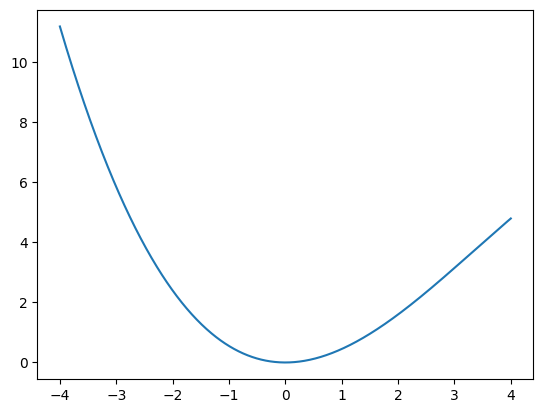

In [134]:
x = sy.symbols("x")
ep = 0.5*k*(x**2) + alpha*(x**3)
ep_lam = sy.lambdify(x, ep, "numpy")

x_vals = np.linspace(-4, 4, 1000)

plt.plot(x_vals, ep_lam(x_vals), linestyle="-")
plt.show()

In [135]:
def maxminv(x0,x1,x2,y0,y1,y2):
 # Máximo ou mínimo usando o polinómio de Lagrange
 # Dados (input): (x0,y0), (x1,y1) e (x2,y2)
 # Resultados (output): xm, ymax
 xab=x0-x1
 xac=x0-x2
 xbc=x1-x2
 a=y0/(xab*xac)
 b=-y1/(xab*xbc)
 c=y2/(xac*xbc)
 xmla=(b+c)*x0+(a+c)*x1+(a+b)*x2
 xm=0.5*xmla/(a+b+c)
 xta=xm-x0
 xtb=xm-x1
 xtc=xm-x2
 ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
 return xm, ymax

In [136]:
def eulercromer():
    for i in range(N-1):
        ax=-(k*xt[i] + 3 * alpha * (xt[i]**2))/m
        
        vxt[i+1]=vxt[i]+ax*dt
        xt[i+1]=xt[i]+vxt[i+1]*dt
        
        t[i+1]= t[i] + dt
        
        ep = 0.5 * k * (xt[i+1])**2 + alpha*(xt[i+1]**3)
        ecin = 0.5 * m * vxt[i+1]**2
        em[i+1] = ep + ecin

        if xt[i-1] < xt[i] > xt[i+1]:
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = xt[i-1], xt[i], xt[i+1]
            xm, xmax = maxminv(t0, t1, t2, y0, y1, y2)
            maximum.append([xm, xmax])
        if xt[i-1]> xt[i] < xt[i+1]:
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = xt[i-1], xt[i], xt[i+1]
            xm, xmin = maxminv(t0, t1, t2, y0, y1, y2)
            minimum.append([xm, xmin])
        
    return
eulercromer()

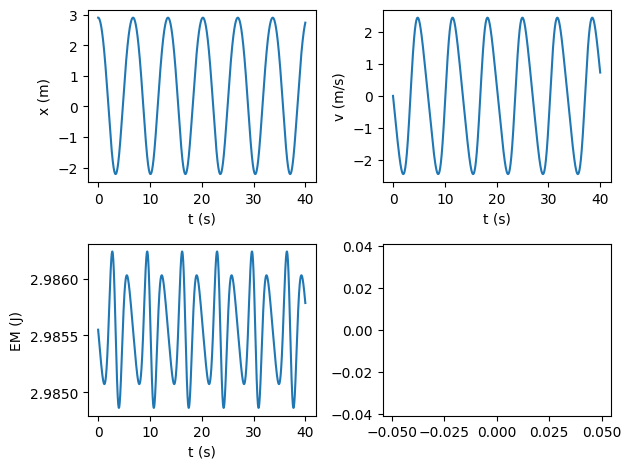

In [137]:
figure, axis = plt.subplots(2,2)
axis[0,0].plot(t, xt, linestyle="-")
axis[0,0].set_xlabel("t (s)")
axis[0,0].set_ylabel("x (m)")
axis[0,1].plot(t, vxt, linestyle="-")
axis[0,1].set_xlabel("t (s)")
axis[0,1].set_ylabel("v (m/s)")
axis[1,0].plot(t, em, linestyle="-")
axis[1,0].set_xlabel("t (s)")
axis[1,0].set_ylabel("EM (J)")
plt.axis('equal')
figure.tight_layout()

In [138]:
maxval= sum([sublist[1] for sublist in maximum])/len(maximum) #find max and min values
minval = max= sum([sublist[1] for sublist in minimum])/len(minimum)
print(minval, maxval)

-2.2112932893816626 2.9604166775900023


In [139]:
def calculate_period():
    for i in range(1, len(maximum)):
        period_list.append(maximum[i][0]-maximum[i-1][0])
    estimated_period= (sum(period_list)/len(period_list))
    return estimated_period
def calculate_amplitude():
    avg_max = sum(x[1] for x in maximum) / len(maximum)
    avg_min = sum(x[1] for x in minimum) / len(minimum)
    return abs(avg_max - avg_min) / 2

T = calculate_period()
Amp = calculate_amplitude()
print(Amp, T)

f = 1/T #frequencia = 1/T

print(f)

2.5858549834858326 6.740991707429496
0.1483461252292987
